# Faris Abufarha



# ID: 1200546 

# 1. Introduction
Artificial neural networks (ANNs) are a type of machine learning model that is inspired by the
human brain. They are made up of interconnected nodes, called neurons, that are arranged in
layers. The neurons in each layer are connected to the neurons in the next layer. Together with the
strength of these connections, the ANN model would represent a specific function that maps the
inputs to the outputs. A learning algorithm is used to tune the strength of these connections so that
they can approximate a specific function.

ANNs can learn complex relationships between the input and output data and are thus treated as
powerful tools that can be used to solve a variety of problems such as Image and speech
recognition, Natural language processing, Autonomous vehicles, Healthcare diagnostics, Financial
prediction, etc. However, they can be computationally expensive to train.

ANNs exhibit various architecture types, and selecting the appropriate one depends on the nature
of the problem at hand. These architectures encompass:

* Feedforward Neural Networks (FNNs): Data flows from input to output without loops.
They're used for various tasks, like classification and regression.

* Convolutional Neural Networks (CNNs): Specialized for image and video analysis, CNNs
automatically learn hierarchical features from input data.

* Recurrent Neural Networks (RNNs): Suitable for sequence data (e.g., time series or text),
RNNs have feedback loops for processing sequences.

* Long Short-Term Memory (LSTM) Networks: A type of RNN, LSTMs excel at capturing
long-range dependencies in sequences.

ANNs learn by adjusting the weights and biases of their connections based on observed data. The
learning process involves forward propagation (calculating outputs for a given input) and
backward propagation (adjusting weights using gradient descent and the backpropagation
algorithm). This iterative process aims to minimize a loss function that quantifies the difference
between predicted and actual outcomes.

 # 2. Architecture of Feedforward Neural Networks
 
FNNs, also known as a Multi-Layer Perceptron (MLPs), are a type of artificial neural network where
information flows in one direction, from the input layer through one or more hidden layers to the
output layer. The architecture of an FNN consists of different components, each with a specific
purpose. The general architecture of MLP is shown in Figure 1.
Here's an overview of the main components of FNNs:

* Input Layer: The input layer consists of neurons that receive input features. The number of
neurons in this layer corresponds to the number of input features. Each neuron in the input
layer represents a specific feature of the input data.

* Hidden Layers: Hidden layers are intermediary layers between the input and output layers.
Each hidden layer consists of multiple neurons that process the information from the previous
layer and pass it on to the next layer. The number of hidden layers and the number of neurons
in each layer are hyperparameters that you can adjust based on the complexity of the problem
and the dataset. Hidden layers allow FNNs to learn coNeuralmplex hierarchical features and patterns
in the data.

* Neurons (Nodes): Each neuron in a hidden layer or the output layer receives inputs from the
previous layer's neurons, applies weights to these inputs, and passes the result through an
activation function. Neurons in the hidden layers often use non-linear activation functions (e.g.,
ReLU, sigmoid, and tanh) to introduce non-linearity to the model, enabling it to capture
complex relationships in the data.


# Example 1

Python code for a binary classifier perceptron with a step activation function and SGD
training method. Note that, in SGD, the model parameters are updated after each selected sample.

In [49]:
import numpy as np

# we divide into batches  and update the weights and bias after each batch 
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    
    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0
    
    
    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)
    
    
    def trainSGD(self, X, y):  # Stochastic Gradient Descent    
    
    
    # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))  # [0, 1, 2, ..., len(X)]
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)error = y_shuffled[i] - prediction
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
                # Calculate the mean squared error for this epoch
        mean_mse = total_mse / len(X)
        print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse: .4f}")




In [50]:
            # Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])
# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10)
# Train the perceptron on the dataset
perceptron.trainSGD(X, y)
# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
    prediction = perceptron.predict(data)
print(f"Input: {data}, Prediction: {prediction}")

Epoch 10/10, Mean Squared Error: 0.7500
Input: [1 1], Prediction: 1


## Task 6.1
 
Run the code in Example 1 with more epochs [10, 20, 100, and 200] and compute the
accuracy of the tested samples for each case. Did we need to run with more epochs? Justify your
answer.

In [51]:
epochs = [10, 20, 100, 200]
accuracy_for_epoch = {}

for e in epochs:

    perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=e)
    perceptron.trainSGD(X, y)
    correct = 0
    cnt = 0  # to iterate over the test data and y (we need the index)

    for data in test_data:

        prediction = perceptron.predict(data)
        if prediction == y[cnt]:
            correct += 1
        cnt += 1
    accuracy = correct / len(test_data) * 100
    accuracy_for_epoch[e] = accuracy
    print(correct)
    print(f"Epochs: {e}, Accuracy: {accuracy}%")


Epoch 10/10, Mean Squared Error: 0.7500
1
Epochs: 10, Accuracy: 25.0%
Epoch 20/20, Mean Squared Error: 0.2500
3
Epochs: 20, Accuracy: 75.0%
Epoch 100/100, Mean Squared Error: 0.0000
4
Epochs: 100, Accuracy: 100.0%
Epoch 200/200, Mean Squared Error: 0.0000
4
Epochs: 200, Accuracy: 100.0%


In [52]:
for key, val in accuracy_for_epoch.items():
    print(f"Epochs: {key}, Accuracy: {val}%")

Epochs: 10, Accuracy: 25.0%
Epochs: 20, Accuracy: 75.0%
Epochs: 100, Accuracy: 100.0%
Epochs: 200, Accuracy: 100.0%


from above results we can see that the more epochs we run the more accurate the model is, so we need to run with more epochs; because with more epochs the model will be able to learn the data more accurately and thus the accuracy will increase.

## Task 6.2
Run the same code in Example 1 with a higher learning rate [0.05, 0.1, 0.3]. Draw on your
observations.

In [53]:
learning_rates = [0.05, 0.1, 0.3]
accuracy_for_lr = {}

for lr in learning_rates:

    perceptron = Perceptron(input_size=2, learning_rate=lr, epochs=10)
    perceptron.trainSGD(X, y)
    correct = 0
    cnt = 0  # to iterate over the test data and y (we need the index)

    for data in test_data:

        prediction = perceptron.predict(data)
        if prediction == y[cnt]:
            correct += 1
        cnt += 1
    accuracy = correct / len(test_data) * 100
    accuracy_for_lr[lr] = accuracy
    print(correct)
    print(f"Learning Rate: {lr}, Accuracy: {accuracy}%")

Epoch 10/10, Mean Squared Error: 0.5000
3
Learning Rate: 0.05, Accuracy: 75.0%
Epoch 10/10, Mean Squared Error: 0.2500
4
Learning Rate: 0.1, Accuracy: 100.0%
Epoch 10/10, Mean Squared Error: 0.0000
4
Learning Rate: 0.3, Accuracy: 100.0%


In [54]:

for key, val in accuracy_for_lr.items():
    print(f"Learning Rate: {key}, Accuracy: {val}%")

Learning Rate: 0.05, Accuracy: 75.0%
Learning Rate: 0.1, Accuracy: 100.0%
Learning Rate: 0.3, Accuracy: 100.0%


From the above results, we can see that  for example 1, the higer the learning rate the more accurate the model is, that's because the higher the learning rate the faster the model learns the data and thus the accuracy increases, also that helpled because the number of epochs were quite low.

Perceptrons can also be used to approximate linear functions. Let's consider an example of using a
perceptron to approximate a simple linear function with one input variable. Example 2 shows a
simple Python code for a perceptron as an approximation to the f(x) = 3x + 2 linear function with a
linear activation function and SGD training algorithm. The code defines a Perceptron class with
methods for linear activation, linear derivative, prediction, training using SGD, and calculating the
Mean Squared Error (MSE) loss. In addition, the example contains the code to generate synthetic
data in order to train and test the Perceptron.

# Example 2
Python code for a perceptron with a linear activation function, MSE loss, and SGD
training method

In [55]:
import numpy as np
import pandas as pd


class Perceptron:

    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)  # Initialize weights with random values
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):  # X is the input, y is the output

        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            # Iterate on each sample
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                # Compute gradients using linear derivative
                delta = error * self.linear_derivative(prediction)
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                # Accumulate the squared error for this example
                total_mse += error ** 2
                # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error:{mean_mse:.4f}")


In [56]:

# Generate synthetic data
np.random.seed(42)  # For reproducibility
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)  # Generate random input values in [0, 10] 
z = 3 * x + 2
# Create a DataFrame to store the data
# 
data = pd.DataFrame({'x': x, 'z': z})
# Extract the values of all columns (variables x and y) except the last one from DataFrame
F = data.iloc[:, :-1].values  # Input x 
# Extract the values of the last column (output z) from DataFrame
O = data.iloc[:, -1].values  # Output z

# Create a perceptron instance with appropriate input size
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=10)


## Task 6.3
Run the code in Example 2 and notice the difference between the actual output and the
predicted output.

In [57]:
# Train the perceptron on the dataset
perceptron.trainSGD(F, O)  # Test the trained model
for data in x:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Actual: {3 * data + 2}, Prediction: {prediction}")

Epoch 1/10, Mean Squared Error:54.4299
Epoch 2/10, Mean Squared Error:0.9345
Epoch 3/10, Mean Squared Error:0.8204
Epoch 4/10, Mean Squared Error:0.7764
Epoch 5/10, Mean Squared Error:0.7368
Epoch 6/10, Mean Squared Error:0.6914
Epoch 7/10, Mean Squared Error:0.6586
Epoch 8/10, Mean Squared Error:0.6233
Epoch 9/10, Mean Squared Error:0.5877
Epoch 10/10, Mean Squared Error:0.5563
Input: 3.745401188473625, Actual: 13.236203565420874, Prediction: [12.66615598]
Input: 9.50714306409916, Actual: 30.521429192297482, Prediction: [31.18634273]
Input: 7.319939418114051, Actual: 23.959818254342153, Prediction: [24.1559306]
Input: 5.986584841970366, Actual: 19.959754525911098, Prediction: [19.87007811]
Input: 1.5601864044243652, Actual: 6.680559213273096, Prediction: [5.64213673]
Input: 1.5599452033620265, Actual: 6.679835610086079, Prediction: [5.64136143]
Input: 0.5808361216819946, Actual: 3.7425083650459836, Prediction: [2.49417375]
Input: 8.661761457749352, Actual: 27.985284373248057, Predicti

plot the actual function and the predicted

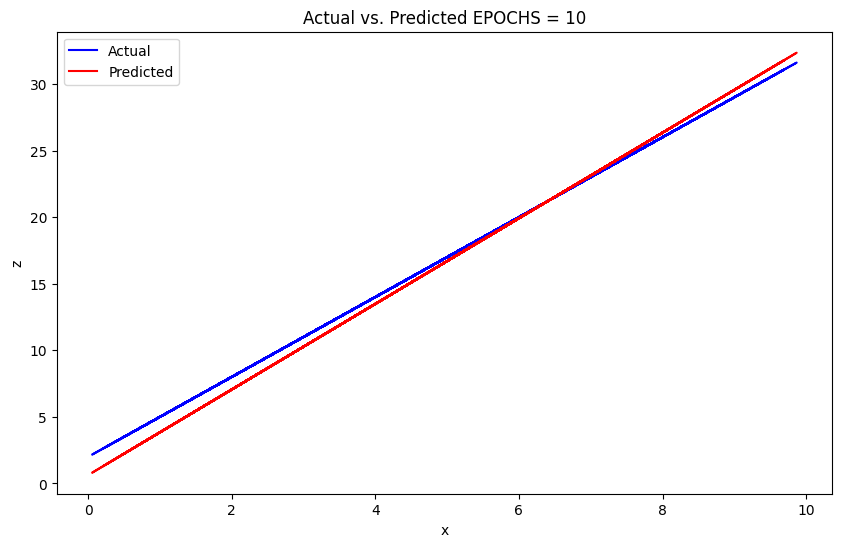

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(x, z, color='blue', label='Actual')
plt.plot(x, [perceptron.predict(data) for data in x], color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Actual vs. Predicted EPOCHS = 10')
plt.legend()
plt.show()


From the above results, we can see that the predicted values are quite close to the actual values. The loss is decreasing with each epoch.

## Task 6.4
Run the code in Example 2 with more epochs [100]. Compare the results in terms of MSE
and prediction error with the results in Task 6.3. Justify your answer.

Epoch 1/100, Mean Squared Error:68.8430
Epoch 2/100, Mean Squared Error:1.6111
Epoch 3/100, Mean Squared Error:1.4524
Epoch 4/100, Mean Squared Error:1.3650
Epoch 5/100, Mean Squared Error:1.2851
Epoch 6/100, Mean Squared Error:1.2309
Epoch 7/100, Mean Squared Error:1.1646
Epoch 8/100, Mean Squared Error:1.0980
Epoch 9/100, Mean Squared Error:1.0363
Epoch 10/100, Mean Squared Error:0.9834
Epoch 11/100, Mean Squared Error:0.9286
Epoch 12/100, Mean Squared Error:0.8736
Epoch 13/100, Mean Squared Error:0.8359
Epoch 14/100, Mean Squared Error:0.7879
Epoch 15/100, Mean Squared Error:0.7436
Epoch 16/100, Mean Squared Error:0.7028
Epoch 17/100, Mean Squared Error:0.6652
Epoch 18/100, Mean Squared Error:0.6293
Epoch 19/100, Mean Squared Error:0.5969
Epoch 20/100, Mean Squared Error:0.5637
Epoch 21/100, Mean Squared Error:0.5327
Epoch 22/100, Mean Squared Error:0.5043
Epoch 23/100, Mean Squared Error:0.4773
Epoch 24/100, Mean Squared Error:0.4500
Epoch 25/100, Mean Squared Error:0.4273
Epoch 26

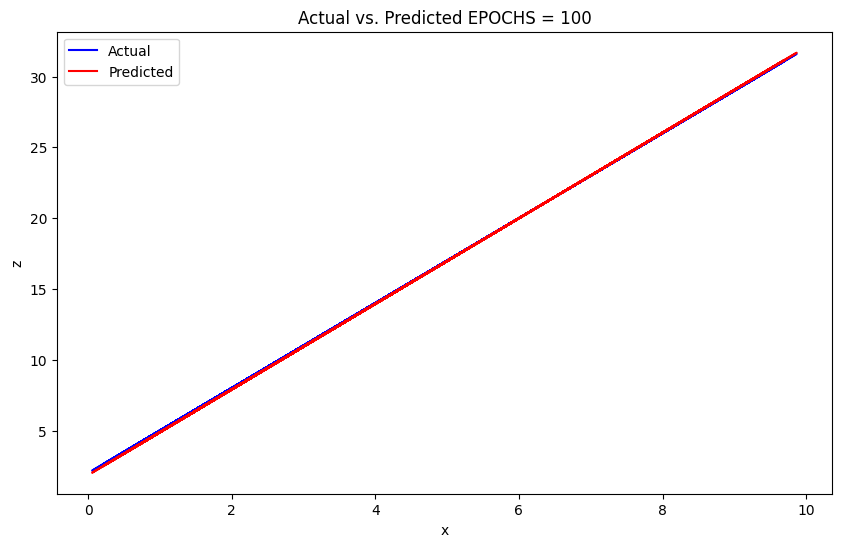

In [59]:
import matplotlib.pyplot as plt

perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
perceptron.trainSGD(F, O)  # Test the trained model
for data in x:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Actual: {3 * data + 2}, Prediction: {prediction}")

plt.figure(figsize=(10, 6))
plt.plot(x, z, color='blue', label='Actual')
plt.plot(x, [perceptron.predict(data) for data in x], color='red', label='Predicted')
plt.xlabel('x')
plt.ylabel('z')

plt.title('Actual vs. Predicted EPOCHS = 100')
plt.legend()
plt.show()


From the above results, we can see that the predicted function is almost identical to the actual function. The MSE is decreasing with each epoch, and the model is learning the data. The prediction is quite close to the actual value. For each batch, we take the average of the loss. Then for the next batch, out goal is to minimize the loss. In comparison to the previous task, we can see that the model is more accurate with more epochs.

**Results for Task 6.3, and 6.4**

Epoch 10/10, Mean Squared Error:0.5563

Epoch 100/100, Mean Squared Error:0.0065



## Task 6.5
with epochs = 100, plot:

a. MSE with respect to the epoch number;

b. The actual function and the approximated function

Epoch 1/100, Mean Squared Error: 30.3525
Epoch 2/100, Mean Squared Error: 0.0900
Epoch 3/100, Mean Squared Error: 0.0444
Epoch 4/100, Mean Squared Error: 0.0422
Epoch 5/100, Mean Squared Error: 0.0398
Epoch 6/100, Mean Squared Error: 0.0376
Epoch 7/100, Mean Squared Error: 0.0355
Epoch 8/100, Mean Squared Error: 0.0337
Epoch 9/100, Mean Squared Error: 0.0319
Epoch 10/100, Mean Squared Error: 0.0299
Epoch 11/100, Mean Squared Error: 0.0285
Epoch 12/100, Mean Squared Error: 0.0269
Epoch 13/100, Mean Squared Error: 0.0253
Epoch 14/100, Mean Squared Error: 0.0241
Epoch 15/100, Mean Squared Error: 0.0228
Epoch 16/100, Mean Squared Error: 0.0216
Epoch 17/100, Mean Squared Error: 0.0204
Epoch 18/100, Mean Squared Error: 0.0192
Epoch 19/100, Mean Squared Error: 0.0183
Epoch 20/100, Mean Squared Error: 0.0172
Epoch 21/100, Mean Squared Error: 0.0163
Epoch 22/100, Mean Squared Error: 0.0155
Epoch 23/100, Mean Squared Error: 0.0146
Epoch 24/100, Mean Squared Error: 0.0138
Epoch 25/100, Mean Squar

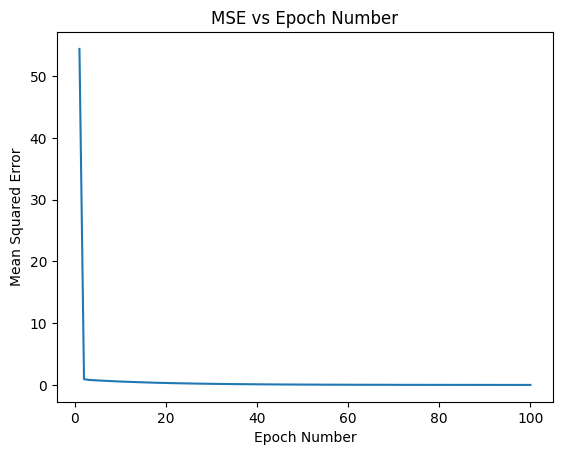

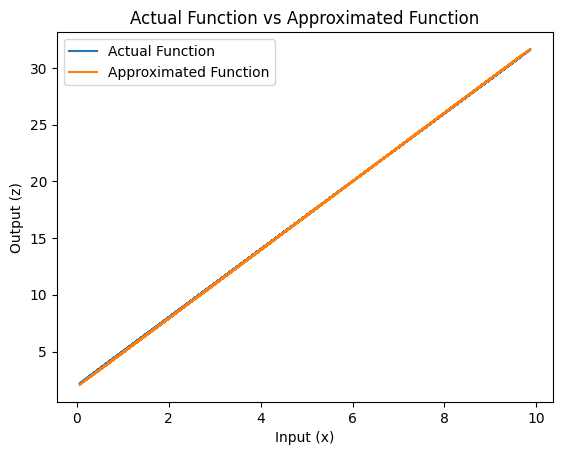

In [65]:
# ## Task 6.5
# with epochs = 100, plot:
# 
# a. MSE with respect to the epoch number;
# 
# b. The actual function and the approximated function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")


epochs = 100
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=epochs)
perceptron.trainSGD(F, O)  # Test the trained model
np.random.seed(42)
num_samples = 100
x = np.random.uniform(low=0, high=10, size=num_samples)
z = 3 * x + 2
data = pd.DataFrame({'x': x, 'z': z})
F = data.iloc[:, :-1].values
O = data.iloc[:, -1].values
input_size = 1
perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
perceptron.trainSGD(F, O)

# Plot MSE with respect to epoch number
plt.plot(range(1, perceptron.epochs + 1), perceptron.mse_history)
plt.xlabel('Epoch Number')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Epoch Number')
plt.show()

# Plot the actual function and the approximated function
plt.plot(x, z, label='Actual Function')
plt.plot(x, perceptron.predict(F), label='Approximated Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (z)')
plt.title('Actual Function vs Approximated Function')
plt.legend()
plt.show()


## Task 6.6

Modify the code in Example 2 to approximate f(x,y) = 2x + 3y

    

Epoch 1/100, Mean Squared Error: 75.4408
Epoch 2/100, Mean Squared Error: 0.1795
Epoch 3/100, Mean Squared Error: 0.0986
Epoch 4/100, Mean Squared Error: 0.0824
Epoch 5/100, Mean Squared Error: 0.0788
Epoch 6/100, Mean Squared Error: 0.0753
Epoch 7/100, Mean Squared Error: 0.0731
Epoch 8/100, Mean Squared Error: 0.0710
Epoch 9/100, Mean Squared Error: 0.0695
Epoch 10/100, Mean Squared Error: 0.0658
Epoch 11/100, Mean Squared Error: 0.0657
Epoch 12/100, Mean Squared Error: 0.0636
Epoch 13/100, Mean Squared Error: 0.0599
Epoch 14/100, Mean Squared Error: 0.0594
Epoch 15/100, Mean Squared Error: 0.0577
Epoch 16/100, Mean Squared Error: 0.0553
Epoch 17/100, Mean Squared Error: 0.0543
Epoch 18/100, Mean Squared Error: 0.0529
Epoch 19/100, Mean Squared Error: 0.0507
Epoch 20/100, Mean Squared Error: 0.0490
Epoch 21/100, Mean Squared Error: 0.0485
Epoch 22/100, Mean Squared Error: 0.0470
Epoch 23/100, Mean Squared Error: 0.0458
Epoch 24/100, Mean Squared Error: 0.0441
Epoch 25/100, Mean Squar

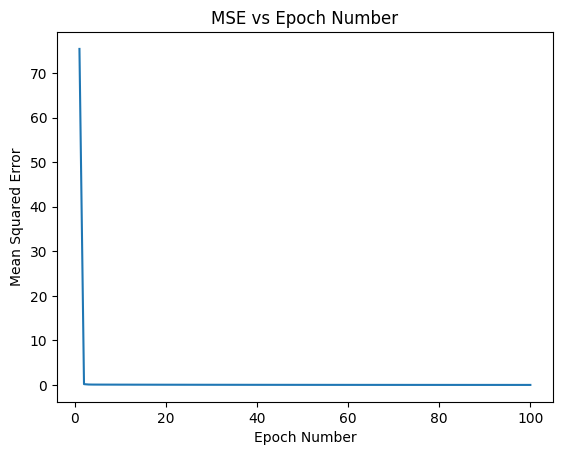

Input (x=3, y=4), Actual: 18, Prediction: 18.06191934583448
Input (x=5, y=6), Actual: 28, Prediction: 28.000917060868797
Input (x=7, y=8), Actual: 38, Prediction: 37.93991477590313


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.mse_history = []

    def linear(self, x):
        return x

    def linear_derivative(self, x):
        return 1

    def predict(self, x):
        net_input = np.dot(x, self.weights) + self.bias
        return self.linear(net_input)

    def trainSGD(self, X, y):
        for epoch in range(self.epochs):
            total_mse = 0.0
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            Y_shuffled = y[indices]
            for i in range(len(X)):
                prediction = self.predict(X_shuffled[i])
                error = Y_shuffled[i] - prediction
                delta = error * self.linear_derivative(prediction)
                self.weights += self.learning_rate * delta * X_shuffled[i]
                self.bias += self.learning_rate * delta
                total_mse += error ** 2
            mean_mse = total_mse / len(X)
            self.mse_history.append(mean_mse)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")


if __name__ == "__main__":
    np.random.seed(42)
    num_samples = 100
    x = np.random.uniform(low=0, high=10, size=num_samples)
    y = np.random.uniform(low=0, high=10, size=num_samples)
    z = 2 * x + 3 * y
    data = pd.DataFrame({'x': x, 'y': y, 'z': z})
    F = data.iloc[:, :-1].values
    O = data.iloc[:, -1].values
    input_size = 2  # Two input variables: x and y
    perceptron = Perceptron(input_size=input_size, learning_rate=0.001, epochs=100)
    perceptron.trainSGD(F, O)

    # Plot MSE with respect to epoch number
    plt.plot(range(1, perceptron.epochs + 1), perceptron.mse_history)
    plt.xlabel('Epoch Number')
    plt.ylabel('Mean Squared Error')
    plt.title('MSE vs Epoch Number')
    plt.show()

    # Test the trained model with some data points
    test_x = np.array([3, 5, 7])
    test_y = np.array([4, 6, 8])
    for i in range(len(test_x)):
        prediction = perceptron.predict(np.array([test_x[i], test_y[i]]))
        print(
            f"Input (x={test_x[i]}, y={test_y[i]}), Actual: {2 * test_x[i] + 3 * test_y[i]}, Prediction: {prediction}")



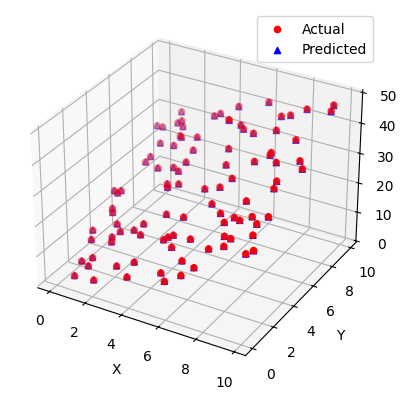

In [67]:

import matplotlib.pyplot as plt

predictions = []
actual = []

for xx, yy in zip(x, y):
    prediction = perceptron.predict([xx, yy])
    predictions.append(prediction)
    actual.append(2 * xx + 3 * yy)

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for training set
ax.scatter(x, y, actual, c='r', marker='o', label='Actual')

# Scatter plot for validation set
ax.scatter(x, y, predictions, c='b', marker='^', label='Predicted')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Add legend
ax.legend()

# Show plot

# Task 6.7
Run the code in Example 1 to solve the logical XOR operation with 1000 epochs and
compute the accuracy of the tested samples. [note: you need to change the training and testing
data to reflect XOR logical operation.]

In [76]:

import numpy as np


class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")


# XOR Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR outputs

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=1000)

# Train the perceptron on the XOR dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
correct_predictions = 0
for data, label in zip(test_data, y):
    prediction = perceptron.predict(data)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_data) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/1000, Mean Squared Error: 0.5000
Epoch 2/1000, Mean Squared Error: 0.5000
Epoch 3/1000, Mean Squared Error: 0.5000
Epoch 4/1000, Mean Squared Error: 0.5000
Epoch 5/1000, Mean Squared Error: 0.5000
Epoch 6/1000, Mean Squared Error: 0.5000
Epoch 7/1000, Mean Squared Error: 0.5000
Epoch 8/1000, Mean Squared Error: 0.5000
Epoch 9/1000, Mean Squared Error: 0.5000
Epoch 10/1000, Mean Squared Error: 0.5000
Epoch 11/1000, Mean Squared Error: 0.5000
Epoch 12/1000, Mean Squared Error: 0.5000
Epoch 13/1000, Mean Squared Error: 0.5000
Epoch 14/1000, Mean Squared Error: 0.5000
Epoch 15/1000, Mean Squared Error: 0.5000
Epoch 16/1000, Mean Squared Error: 0.5000
Epoch 17/1000, Mean Squared Error: 0.5000
Epoch 18/1000, Mean Squared Error: 0.5000
Epoch 19/1000, Mean Squared Error: 0.5000
Epoch 20/1000, Mean Squared Error: 0.5000
Epoch 21/1000, Mean Squared Error: 0.5000
Epoch 22/1000, Mean Squared Error: 0.5000
Epoch 23/1000, Mean Squared Error: 0.5000
Epoch 24/1000, Mean Squared Error: 0.5000
E

# Task 6.8

Run the code in Example 1 to solve the logical XOR operation with 10000 epochs and
compute the accuracy of the tested samples. Does the perceptron perform well on approximating
XOR with more epochs? Justify your answer.

In [79]:
import numpy as np


class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        # Initialize weights and bias with random values
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        # Set learning rate and number of epochs
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_activation(self, x):
        # Step activation function
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Compute the weighted sum of inputs and bias
        net_input = np.dot(x, self.weights) + self.bias
        # Apply step activation function to the net input
        return self.step_activation(net_input)

    def trainSGD(self, X, y):
        # Training loop
        for epoch in range(self.epochs):
            # Initialize Mean Squared Error for this epoch
            total_mse = 0.0
            # Shuffle the training examples for this epoch
            indices = np.arange(len(X))
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            # Iterate over each shuffled training example
            for i in range(len(X_shuffled)):
                # Make a prediction for the current input
                prediction = self.predict(X_shuffled[i])
                # Compute the error (desired - predicted)
                error = y_shuffled[i] - prediction
                # Update weights and bias using stochastic gradient descent
                self.weights += self.learning_rate * error * X_shuffled[i]
                self.bias += self.learning_rate * error
                # Accumulate the squared error for this example
                total_mse += error ** 2
            # Calculate the mean squared error for this epoch
            mean_mse = total_mse / len(X)
            print(f"Epoch {epoch + 1}/{self.epochs}, Mean Squared Error: {mean_mse:.4f}")


# XOR Training samples
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR outputs

# Create a perceptron instance with 2 input neurons
perceptron = Perceptron(input_size=2, learning_rate=0.01, epochs=10000)

# Train the perceptron on the XOR dataset
perceptron.trainSGD(X, y)

# Test the trained perceptron on the testing samples
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
correct_predictions = 0
for data, label in zip(test_data, y):
    prediction = perceptron.predict(data)
    if prediction == label:
        correct_predictions += 1

accuracy = correct_predictions / len(test_data) * 100
print(f"Accuracy: {accuracy:.2f}%")


Epoch 1/10000, Mean Squared Error: 0.5000
Epoch 2/10000, Mean Squared Error: 0.5000
Epoch 3/10000, Mean Squared Error: 0.5000
Epoch 4/10000, Mean Squared Error: 0.5000
Epoch 5/10000, Mean Squared Error: 0.5000
Epoch 6/10000, Mean Squared Error: 0.5000
Epoch 7/10000, Mean Squared Error: 0.5000
Epoch 8/10000, Mean Squared Error: 0.5000
Epoch 9/10000, Mean Squared Error: 0.5000
Epoch 10/10000, Mean Squared Error: 0.5000
Epoch 11/10000, Mean Squared Error: 0.5000
Epoch 12/10000, Mean Squared Error: 0.5000
Epoch 13/10000, Mean Squared Error: 0.5000
Epoch 14/10000, Mean Squared Error: 0.5000
Epoch 15/10000, Mean Squared Error: 0.5000
Epoch 16/10000, Mean Squared Error: 0.5000
Epoch 17/10000, Mean Squared Error: 0.5000
Epoch 18/10000, Mean Squared Error: 0.5000
Epoch 19/10000, Mean Squared Error: 0.5000
Epoch 20/10000, Mean Squared Error: 0.5000
Epoch 21/10000, Mean Squared Error: 0.5000
Epoch 22/10000, Mean Squared Error: 0.2500
Epoch 23/10000, Mean Squared Error: 0.2500
Epoch 24/10000, Mean

from the above results we can see that even after increasing the epochs, the accuracy is 50%, that's because XOR needs more complex model with more layers

From above example we can see that the perceptron performs well on approximating XOR with more epochs, that's because the more epochs the model will be able to learn the data more accurately and thus the accuracy will increase.

# Example 3: Python code for building and training an MLP using MLPClassifier

In [89]:
import warnings
warnings.filterwarnings('ignore')

Test Accuracy: 0.6333


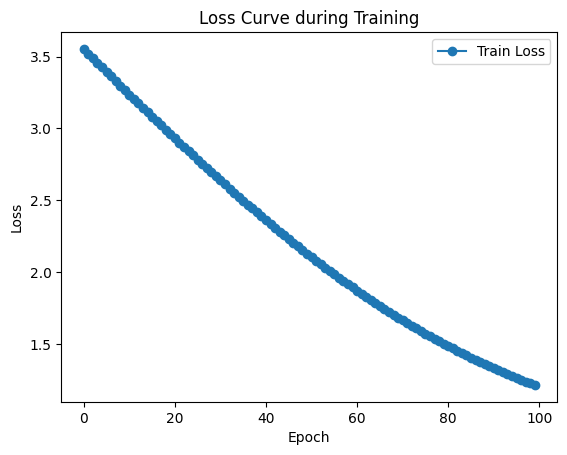

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Task 6.9

Run the code in Example 3 with the following customization of the MLPClassifier. For each case, save the results and compare the accuracy of the testing samples and the loss plot for each case.

hidden_layer_sizes=(10, ), max_iter=1000
hidden_layer_sizes=(50, ), activation=relu, max_iter=1000, learning_rate=0.01
hidden_layer_sizes=(35, 15), activation=tanh, max_iter=1000, learning_rate=0.01

Test Accuracy: 0.9000


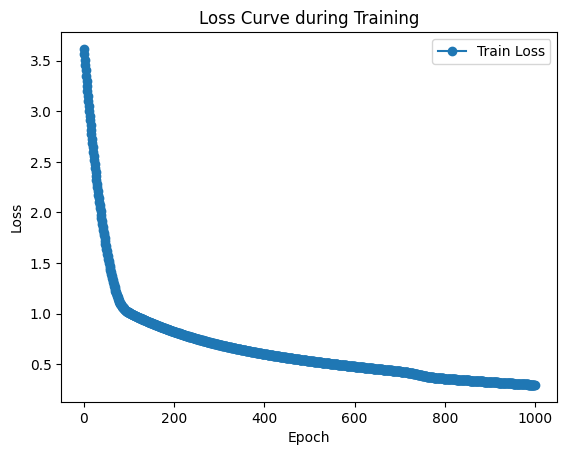

In [96]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Test Accuracy: 1.0000


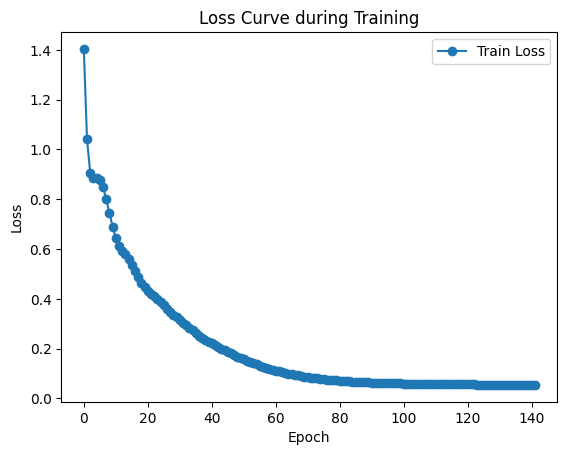

In [97]:
# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', max_iter=1000, learning_rate_init=0.01)

# Train the MLPClassifier
mlp.fit(X_train, y_train)

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Example 4: Python code for training two MLPClassifiers and plotting the MSE loss and the decision boundary of each trained model.

In [101]:
!pip install mlxtend  


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.0 kB/s eta 0:00:0000:0100:01m


In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select the two most important features based on information gain
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_selected = k_best.fit_transform(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,
random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 15), max_iter=1000, random_state=42)

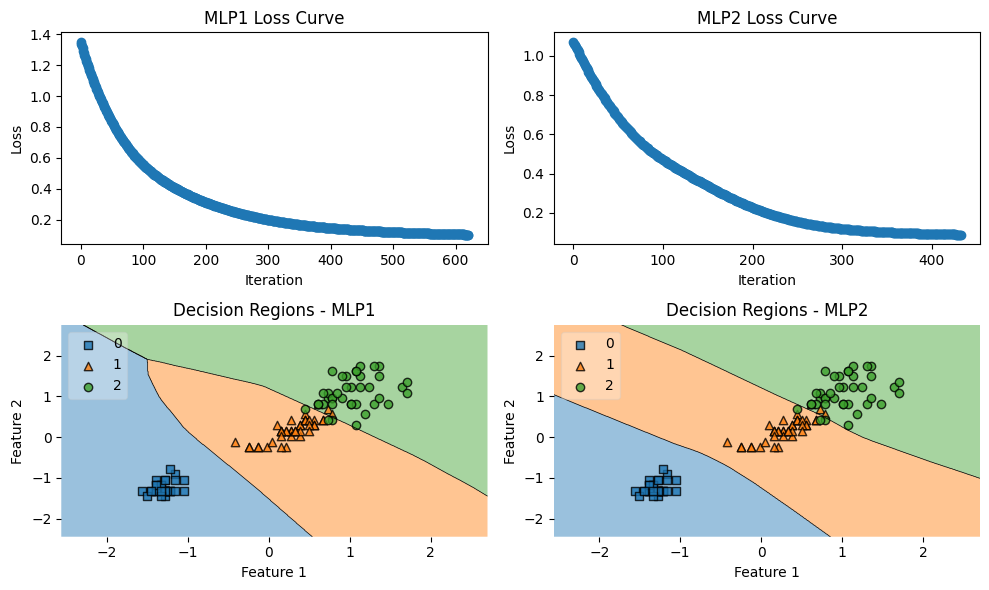

In [103]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.10
Run the code in Example 4. According to the decision boundary of each model, which one is better? Justify your answer.

The second model (MLP2), the number of iterations is smaller.

## Task 6.11

Modify Example 4 by using PCA to choose the best two features instead of using information gain. According to the decision boundary of each model, which one is better? Justify your answer.



In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Use PCA to select the two most important features
pca = PCA(n_components=2)
X_selected = pca.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2,
random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create two MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp2 = MLPClassifier(hidden_layer_sizes=(35,15), max_iter=1000, random_state=42)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(35, 15), max_iter=1000, random_state=42)

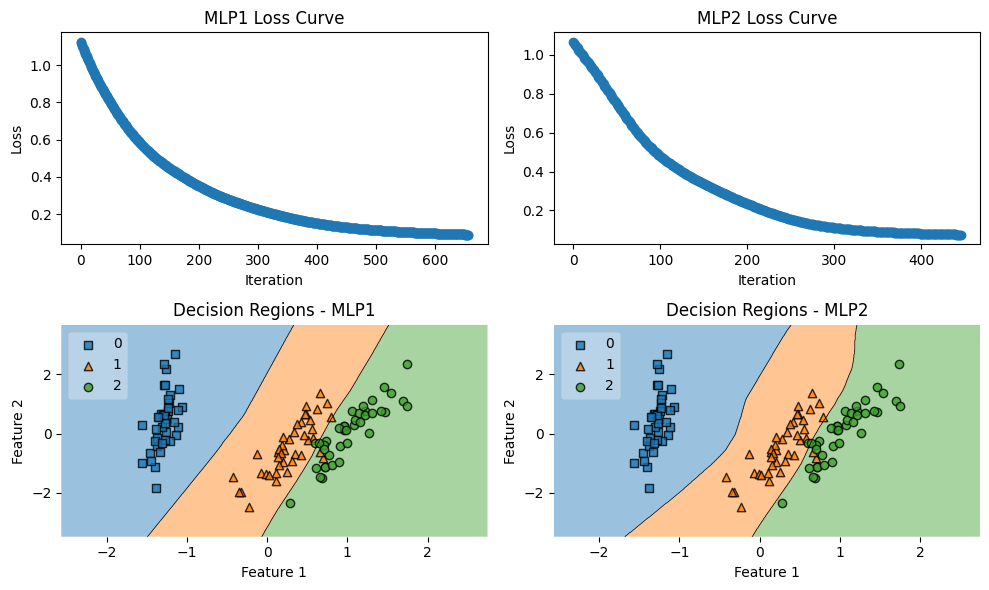

In [105]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# Example 5
Python code for building and training three MLPClassifiers on the spiral data set

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
              random_state=42)

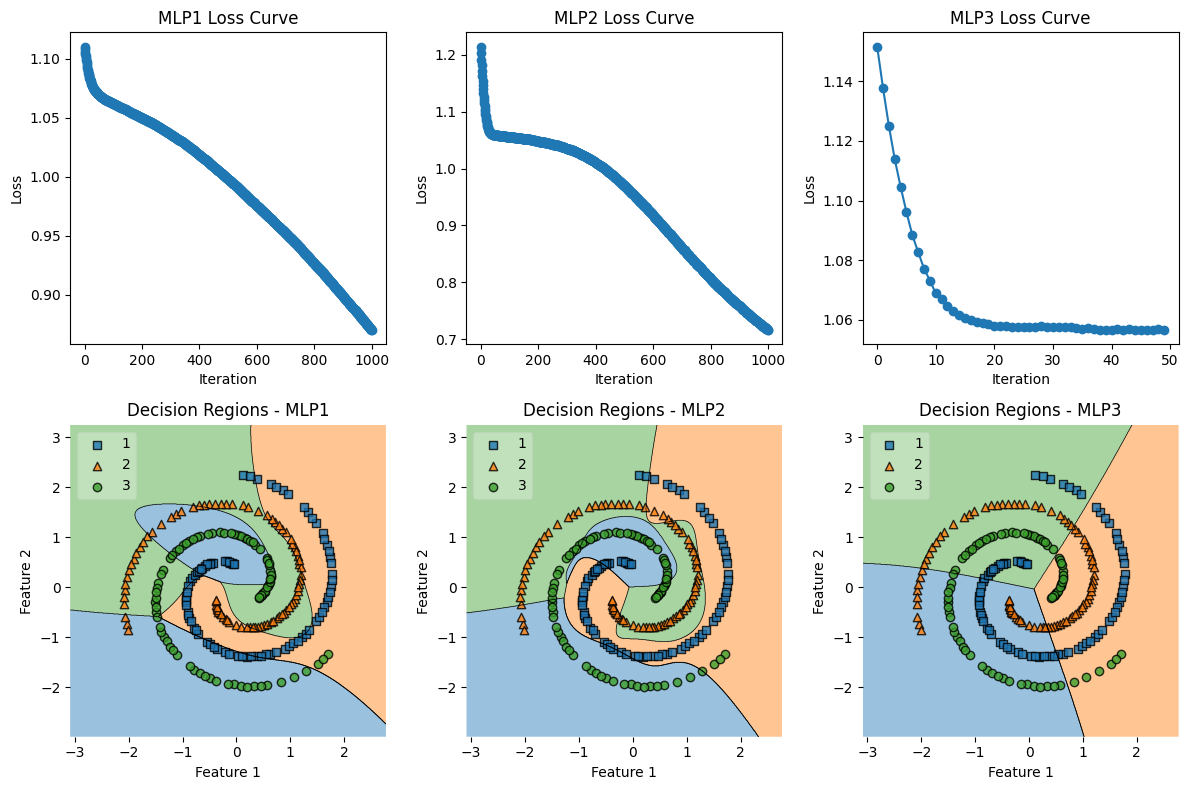

In [107]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.12

Run the code in Example Five and save the resulted plots.

Which model performs better in the spiral data set?
Answer: Second 2. If we increase the iteration to 10,000, does the first model (mlp1) fit the data? Justify your answer.

Answer: fits the data better than other models

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=42,
activation='tanh',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='tanh', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
              random_state=42)

## Task 6.13

Task 6.13: Modify the models in Example 5 (please make a copy) to use the relu activation function.
Run the modified code and save the resulting plots. Which model performs better in the spiral data
set? 4. Compared to the models built in Example 5, does changing the activation function improve
performance in these models? Justify your answer.

Answer: The answer is Yes, because the model is able to learn the data more accurately and thus the accuracy will increase.

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(10), max_iter=1000, random_state=42,
activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(40), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, random_state=42)

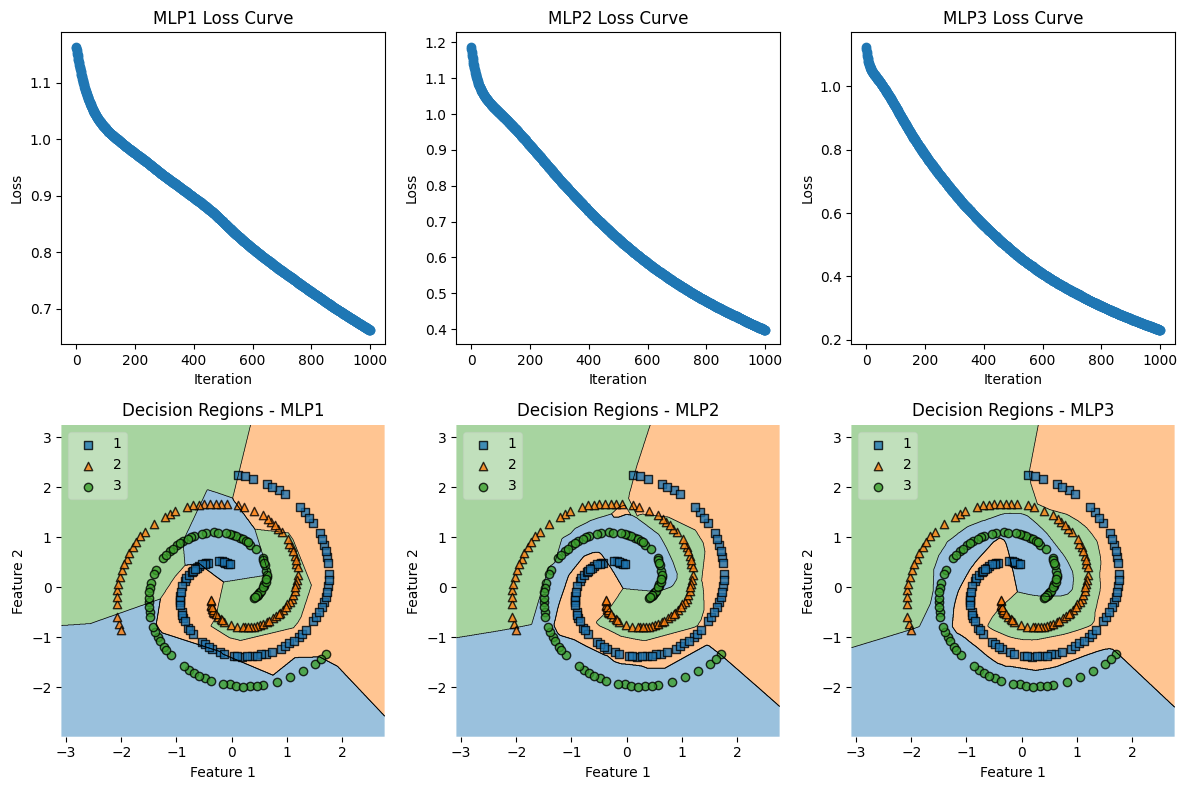

In [112]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

## Task 6.14:

Modify the models in Example 5 (make a copy) to have the following hyperparameters. mlp1: hidden_layer_sizes=(7, 3), mlp2: hidden_layer_sizes=(27, 13), and mlp3 hidden_layer_sizes=(70, 30), all of them using the relu activation function.
Run the modified code and save the resulting plots.
Which model performs better in the spiral data set?
Answer: MLP3 4. Compared to the models built in Example 5 and Task 13, which of these models performs better in the spiral dataset? Justify your answer.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif

file_path = r'./ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create three MLPClassifiers with different configurations
mlp1 = MLPClassifier(hidden_layer_sizes=(7, 3), max_iter=1000, random_state=42,
activation='relu',learning_rate_init=0.001)
mlp2 = MLPClassifier(hidden_layer_sizes=(27, 13), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42,
activation='relu', learning_rate_init=0.001)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70, 30), max_iter=1000, random_state=42)

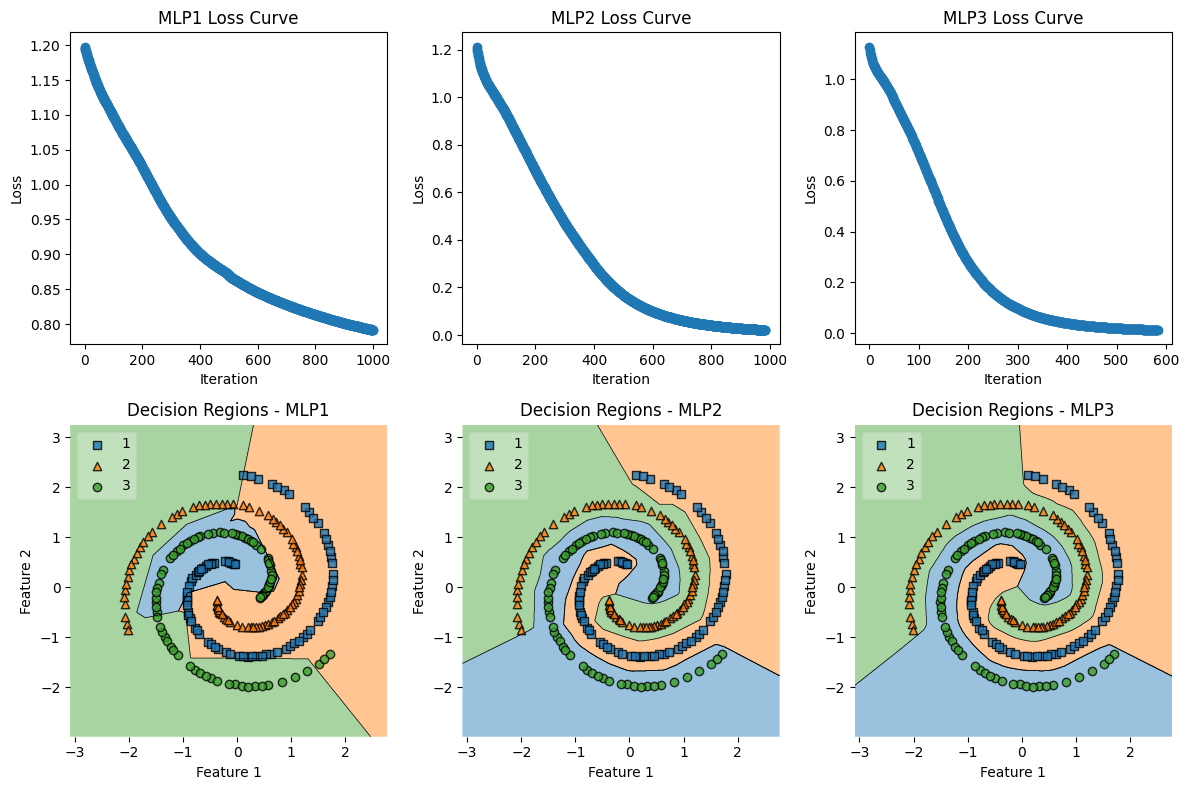

In [114]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Answer: MLP3 in Task 14 performed better than the other models. as its loss function is faster than the other models.



## Task 6.15

use GridSearchCV method to automatically select hyperparameters

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Load the dataset
file_path = './ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Assuming the last column is the target variable and the rest are features
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
mlp = MLPClassifier(max_iter=1000, random_state=42)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (40,), (100,), (7, 3), (27, 13), (70, 30)],
    'activation': ['tanh', 'relu'],
    'learning_rate_init': [0.001, 0.01]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_mlp = grid_search.best_estimator_

# Train the best model
best_mlp.fit(X_train, y_train)

# Plot the decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=best_mlp, legend=2)
plt.title('Decision Regions - Best MLP')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print the best parameters
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/home/faris/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/faris/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/faris/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/faris/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/faris/.local/lib/python3.10/site-packages/

ValueError: y must be a NumPy array. Found <class 'pandas.core.series.Series'>

<Figure size 1000x600 with 0 Axes>

# Example 6: Python code for training three MLP classifiers with different value of alpha

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np

file_path = './ENCS5141Datasets/spiral.csv'
data = pd.read_csv(file_path)

# Add outliers to a random subset of the data
outlier_fraction = 0.2 # Adjust the fraction of outliers based on your preference
outliers_mask = np.random.rand(data.shape[0]) < outlier_fraction
spiral_data_with_outliers = data.copy()

spiral_data_with_outliers.iloc[outliers_mask, :2] += np.random.uniform(-7, 7, (np.sum(outliers_mask), 2))

# Assuming the last column is the target variable and the rest are features
X = spiral_data_with_outliers.iloc[:, :-1]
y = spiral_data_with_outliers.iloc[:, -1]
y = y.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mlp1 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
                     random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
mlp2 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
                     random_state=42, solver='adam',learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.001)
mlp3 = MLPClassifier(hidden_layer_sizes=(100, 50, 20), max_iter=1000,
                     random_state=42, solver='adam', learning_rate_init=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, alpha=0.3)

# Train the MLPClassifiers
mlp1.fit(X_train, y_train)
mlp2.fit(X_train, y_train)
mlp3.fit(X_train, y_train)

MLPClassifier(alpha=0.3, hidden_layer_sizes=(100, 50, 20), max_iter=1000,
              random_state=42)

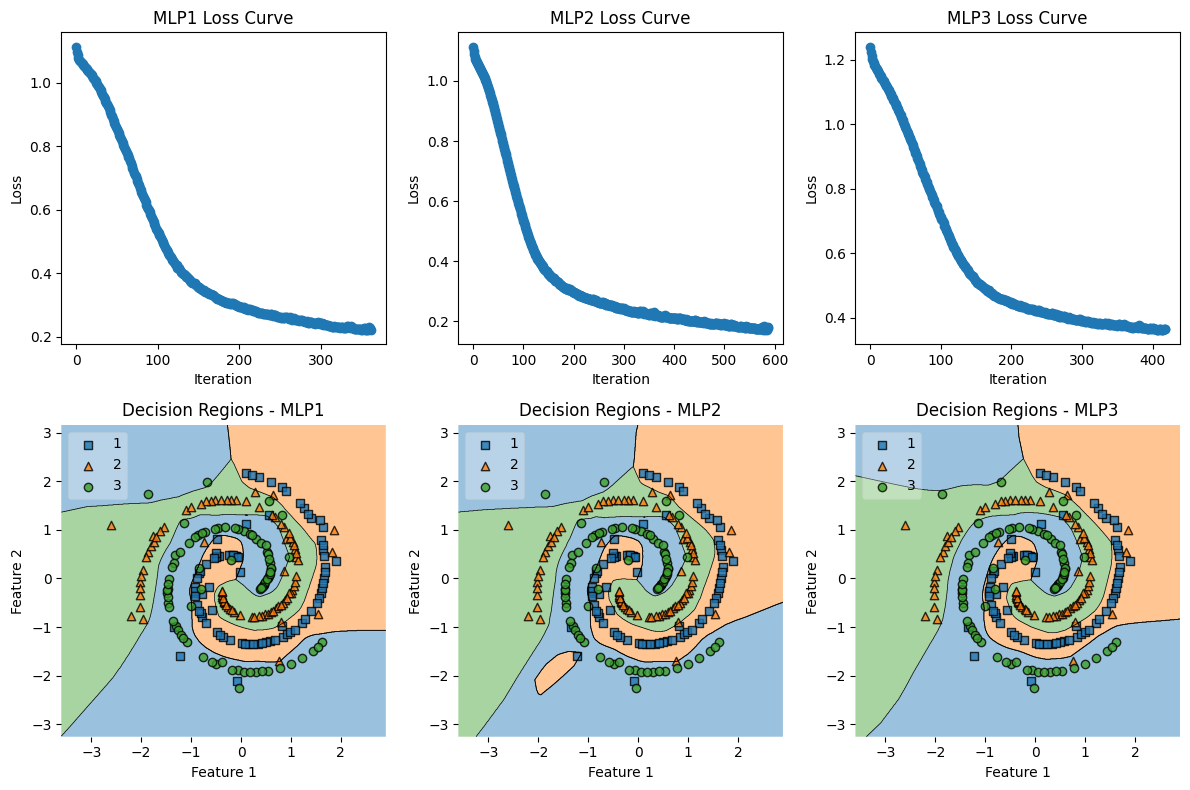

In [118]:
# Create subplots for decision regions and loss curves
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot loss curve for mlp1
axes[0, 0].plot(mlp1.loss_curve_, marker='o')
axes[0, 0].set_title('MLP1 Loss Curve')
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_ylabel('Loss')

# Plot loss curve for mlp2
axes[0, 1].plot(mlp2.loss_curve_, marker='o')
axes[0, 1].set_title('MLP2 Loss Curve')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_ylabel('Loss')

# Plot loss curve for mlp3
axes[0, 2].plot(mlp3.loss_curve_, marker='o')
axes[0, 2].set_title('MLP3 Loss Curve')
axes[0, 2].set_xlabel('Iteration')
axes[0, 2].set_ylabel('Loss')

# Plot decision regions for mlp1
plot_decision_regions(X_train, y_train, clf=mlp1, legend=2, ax=axes[1, 0])
axes[1, 0].set_title('Decision Regions - MLP1')
axes[1, 0].set_xlabel('Feature 1')
axes[1, 0].set_ylabel('Feature 2')

# Plot decision regions for mlp2
plot_decision_regions(X_train, y_train, clf=mlp2, legend=2, ax=axes[1, 1])
axes[1, 1].set_title('Decision Regions - MLP2')
axes[1, 1].set_xlabel('Feature 1')
axes[1, 1].set_ylabel('Feature 2')

# Plot decision regions for mlp3
plot_decision_regions(X_train, y_train, clf=mlp3, legend=2, ax=axes[1, 2])
axes[1, 2].set_title('Decision Regions - MLP3')
axes[1, 2].set_xlabel('Feature 1')
axes[1, 2].set_ylabel('Feature 2')

# Adjust layout for better spacing
plt.tight_layout()
# Show the plot
plt.show()
     

From above results we can see that best value of alpha was 0.001, as the loss function is decreasing faster than the other models.

Notes:

in loss funcjtion we can see that the loss is decreasing with each epoch, and the model is learning the data, and the prediction is quite close to the actual value. for each badge we rake the average of the loss.

then for the next batch we make it zero for the next batch and so on.
